In [1]:
! gdown https://drive.google.com/file/d/1ZWRlfZV1sQaTr921FKEQC8hNHJyB_kr4/view?usp=sharing

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1ZWRlfZV1sQaTr921FKEQC8hNHJyB_kr4
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/file/d/1ZWRlfZV1sQaTr921FKEQC8hNHJyB_kr4/view?usp=sharing
To: /content/view?usp=sharing
70.6kB [00:00, 9.41MB/s]


In [2]:
! gdown https://drive.google.com/uc?id=1ZWRlfZV1sQaTr921FKEQC8hNHJyB_kr4

Downloading...
From: https://drive.google.com/uc?id=1ZWRlfZV1sQaTr921FKEQC8hNHJyB_kr4
To: /content/Garbage Classification.zip
129MB [00:00, 148MB/s]


In [3]:
! unzip Garbage\ Classification.zip

Archive:  Garbage Classification.zip
  inflating: Garbage Classification/~$ro-indexed-files.txt  
 extracting: Garbage Classification/archive.zip  
   creating: Garbage Classification/Garbage classification/
   creating: Garbage Classification/Garbage classification/cardboard/
  inflating: Garbage Classification/Garbage classification/cardboard/cardboard1.jpg  
  inflating: Garbage Classification/Garbage classification/cardboard/cardboard10.jpg  
  inflating: Garbage Classification/Garbage classification/cardboard/cardboard100.jpg  
  inflating: Garbage Classification/Garbage classification/cardboard/cardboard101.jpg  
  inflating: Garbage Classification/Garbage classification/cardboard/cardboard102.jpg  
  inflating: Garbage Classification/Garbage classification/cardboard/cardboard103.jpg  
  inflating: Garbage Classification/Garbage classification/cardboard/cardboard104.jpg  
  inflating: Garbage Classification/Garbage classification/cardboard/cardboard105.jpg  
  inflating: Garbage 

In [4]:
dataset = "/content/Garbage Classification/Garbage classification"

# 1. initial Setup and Imports

In [5]:
import numpy as np

#import tensorflow to use any tools needed for deep learning
import tensorflow as tf

#import keras api needed to implement deep learning techiques
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import libraries for visualization of data
import matplotlib.pyplot as plt

#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline
import os

# 2. Load and Split images along with applying Data Preprocessing and Data Augmentation

In [6]:
cls = os.listdir(dataset)
cls

['glass', 'plastic', 'metal', 'cardboard', 'paper', 'trash']

In [22]:
#paths to the train, validation and test image datasets 

train_path = dataset
valid_path = dataset


idg=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,rescale=1/255,preprocessing_function=tf.keras.applications.vgg16.preprocess_input,validation_split=0.1)


In [23]:
train_idg=idg.flow_from_directory(directory=train_path,target_size=(224,224), classes=cls, batch_size=32, subset='training')
val_idg=idg.flow_from_directory(directory=train_path,target_size=(224,224), classes=cls, batch_size=32, subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


# 3. Visualization of the images after Preprocessing

In [24]:
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
    plt.tight_layout()
    plt.show()

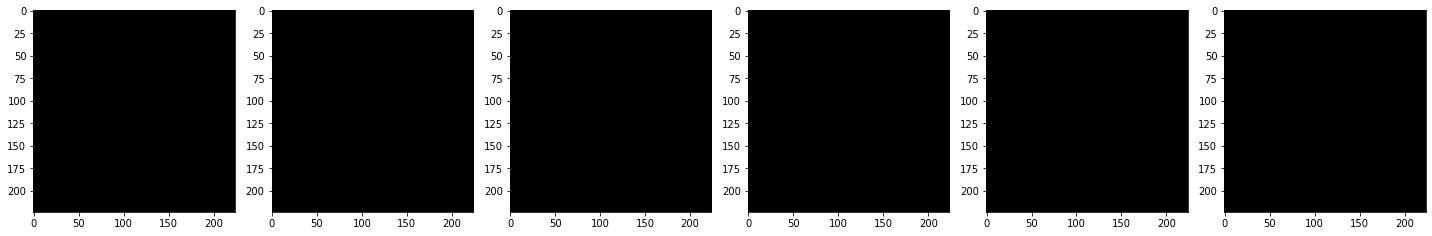

In [25]:
imgs, labels = next(train_idg)
plotImages(imgs)

# 4. Building CNN Architecture

In [26]:
# import the convolution base of the VGG16 model with pre-trained weights
vgg_model = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),include_top=False)

In [27]:
# summary of convolution base of VGG16 model
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:
# Initialize a sequential model to group a linear stack of layers
model = tf.keras.models.Sequential()

# Freeze the convolutional base of VGG16 to prevent the pre-trained weights being updated 
# during training inorder to extract features
vgg_model.trainable=False

# add VGG16 convolution base to initialize sequential model
model.add(vgg_model)

# add global average pooling layer
model.add(tf.keras.layers.GlobalAveragePooling2D())

# add densely-connected NN layer with 512 hidden units
model.add(tf.keras.layers.Dense(units=512, activation='relu'))  # use ReLU activation function
model.add(tf.keras.layers.BatchNormalization())                 # normalize and scale inputs or activations
model.add(tf.keras.layers.Dropout(0.2))                         # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 128 hidden units
model.add(tf.keras.layers.Dense(units=128, activation='relu')) # use ReLU activation function
model.add(tf.keras.layers.BatchNormalization())                # normalize and scale inputs or activations
model.add(tf.keras.layers.Dropout(0.2))                        # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 6 hidden units
model.add(tf.keras.layers.Dense(units=6, activation='softmax')) # use Softmax activation function to do final predictions

In [29]:
# summary of proposed CNN model(architecture)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)              

# 5. Compile the Built CNN Model

In [32]:
# compile the built CNN model by selecting suitable optimizer and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# train the model with appropriate number of epochs
model_details = model.fit(x=train_idg, validation_data=val_idg, epochs=20, verbose=2)

Epoch 1/20
72/72 - 35s - loss: 1.3313 - accuracy: 0.5031 - val_loss: 1.5382 - val_accuracy: 0.3466
Epoch 2/20
72/72 - 32s - loss: 1.1391 - accuracy: 0.5738 - val_loss: 1.3814 - val_accuracy: 0.4661
Epoch 3/20
72/72 - 33s - loss: 1.0784 - accuracy: 0.5905 - val_loss: 1.2244 - val_accuracy: 0.6414
Epoch 4/20
72/72 - 32s - loss: 0.9624 - accuracy: 0.6318 - val_loss: 1.0266 - val_accuracy: 0.6853
Epoch 5/20
72/72 - 32s - loss: 0.9208 - accuracy: 0.6511 - val_loss: 0.9405 - val_accuracy: 0.7012
Epoch 6/20
72/72 - 32s - loss: 0.8696 - accuracy: 0.6718 - val_loss: 0.8074 - val_accuracy: 0.7530
Epoch 7/20
72/72 - 32s - loss: 0.8062 - accuracy: 0.7069 - val_loss: 0.7714 - val_accuracy: 0.7331
Epoch 8/20
72/72 - 32s - loss: 0.8287 - accuracy: 0.6951 - val_loss: 0.7435 - val_accuracy: 0.7291
Epoch 9/20
72/72 - 32s - loss: 0.7776 - accuracy: 0.7091 - val_loss: 0.6770 - val_accuracy: 0.7689
Epoch 10/20
72/72 - 32s - loss: 0.7504 - accuracy: 0.7307 - val_loss: 0.6607 - val_accuracy: 0.7849
Epoch 11/

No handles with labels found to put in legend.


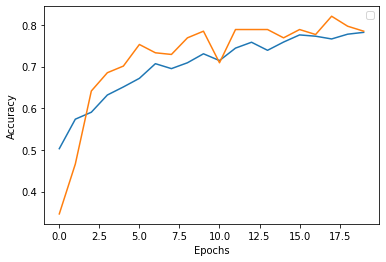

In [39]:
plt.plot(model_details.history["accuracy"])
plt.plot(model_details.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()

No handles with labels found to put in legend.


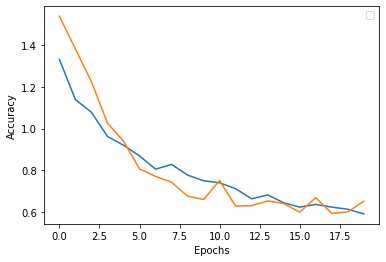

In [43]:
plt.plot(model_details.history["loss"])
plt.plot(model_details.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [44]:
# store the losses of training
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [45]:
# store the accuracy of training
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

# 7. Fine Tune the CNN model

In [47]:
# unfreeze the convolution base of VGG16 inorder to fine-tune which adapt these pre-trained weights 
# to work with the new dataset
vgg_model.trainable=True

In [48]:
# summary of the fine-tune CNN model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)              

In [50]:
# train and fine-tune the model with appropriate number of epochs
model_details = model.fit(x=train_idg, validation_data=val_idg, epochs=5, verbose=2)

Epoch 1/5
72/72 - 33s - loss: 0.5943 - accuracy: 0.7865 - val_loss: 0.6161 - val_accuracy: 0.7928
Epoch 2/5
72/72 - 32s - loss: 0.5589 - accuracy: 0.7966 - val_loss: 0.6258 - val_accuracy: 0.7729
Epoch 3/5
72/72 - 32s - loss: 0.5639 - accuracy: 0.7895 - val_loss: 0.6353 - val_accuracy: 0.7689
Epoch 4/5
72/72 - 32s - loss: 0.5385 - accuracy: 0.7961 - val_loss: 0.6363 - val_accuracy: 0.7769
Epoch 5/5
72/72 - 32s - loss: 0.5436 - accuracy: 0.8036 - val_loss: 0.5747 - val_accuracy: 0.8127


# 8. Visulization of Accuracy and Loss in Training and Validation sets

In [52]:
# append the losses to previous stored losses
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])

In [53]:
# append the accuracy to previous stored accuracy
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

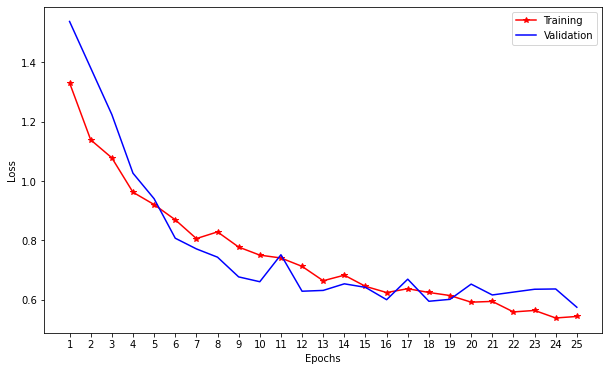

In [55]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,"r*-",label="Training")
plt.plot(epochs,validation_loss,"b",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

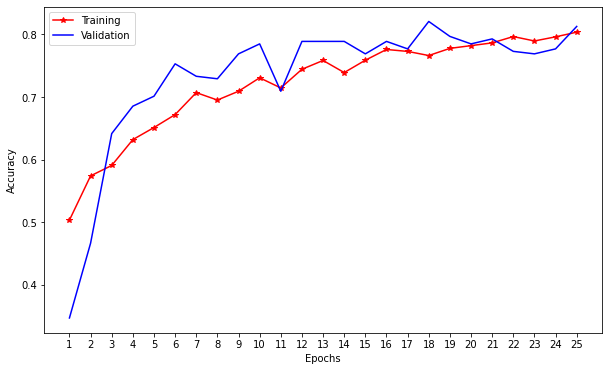

In [56]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,"r*-",label="Training")
plt.plot(epochs,validation_accuracy,"b",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

In [58]:
pred_Y = model.predict(val_idg, batch_size = 32, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)

8/8 [==============================] - 3s 417ms/step


In [59]:
cls = os.listdir(dataset)
cls

['glass', 'plastic', 'metal', 'cardboard', 'paper', 'trash']

In [60]:
from sklearn.preprocessing import LabelBinarizer
LABELS=['cardboard', 'plastic', 'metal', 'glass', 'paper', 'trash']
# binarize the labels
labels = np.array(LABELS)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [61]:
!pip install imutils

In [62]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import pickle
import cv2
import os

In [63]:
def predict(imagePath):
    # load the input image (in Keras format) from disk and preprocess
    # it, scaling the pixel intensities to the range [0, 1]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    output = image.copy()
    image = cv2.resize(image, (224, 224))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    # make bounding box predictions on the input image
    proba = model.predict(image)[0]
    idx = np.argmax(proba)
    label = lb.classes_[idx]
    label = "{}: {:.2f}% ".format(label, proba[idx] * 100)
    cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
        0.7, (255, 0, 0), 2)
        
    # show the output image
    fig=plt.figure(figsize=(10,10))
    plt.grid(b=None)
    plt.axis('off')
    return plt.imshow(output)


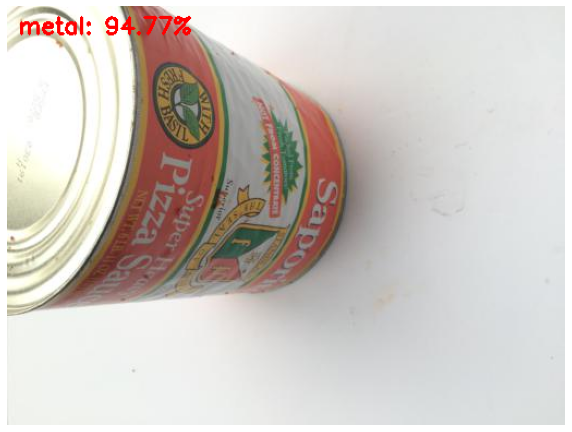

In [66]:
imagePath = "/content/Garbage Classification/Garbage classification/metal/metal1.jpg"
predict(imagePath)